In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get TOYOTA data
orig = yf.download(['7203.T'], start="2020-01-01", end="2024-12-31")
orig = orig[('Adj Close')]
orig.tail()

[*********************100%***********************]  1 of 1 completed


Date
2024-03-13    3444.0
2024-03-14    3445.0
2024-03-15    3488.0
2024-03-18    3567.0
2024-03-19    3675.0
Name: Adj Close, dtype: float64

<Axes: >

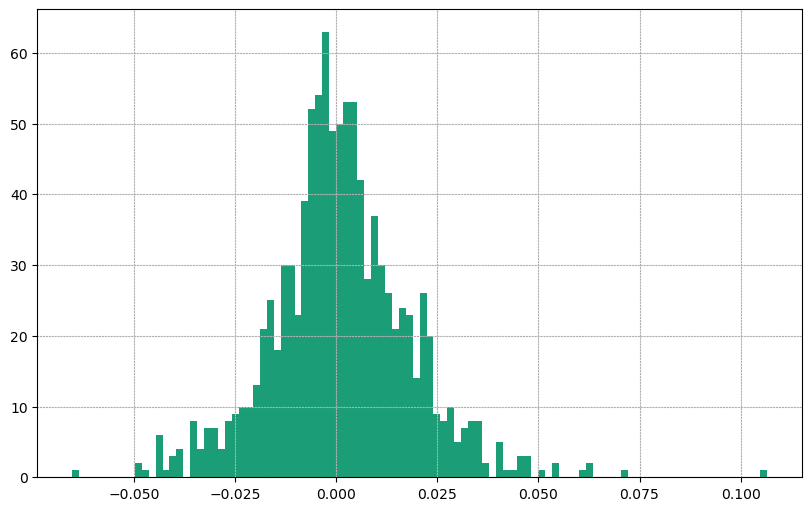

In [3]:
returns = orig.pct_change()
last_price = orig[-1]
returns.hist(bins=100)

In [4]:
daily_volatility = returns.std()
rtn = np.random.normal(0, daily_volatility)
rtn

-0.02771407762030653

In [5]:
price = last_price * (1  + rtn)
price

3573.1507647453736

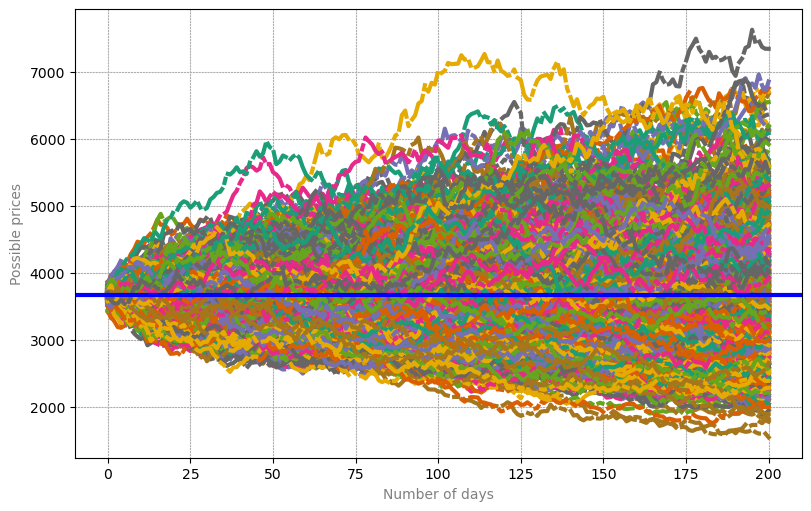

In [6]:
num_simulations = 1000
num_days = 200
simulation_df = pd.DataFrame()
for x in range(num_simulations):
    count = 0    
    # The first price point
    price_series = []
    rtn = np.random.normal(0, daily_volatility)
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = np.random.normal(0, daily_volatility)
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_df[x] = price_series
fig = plt.figure()
plt.plot(simulation_df)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

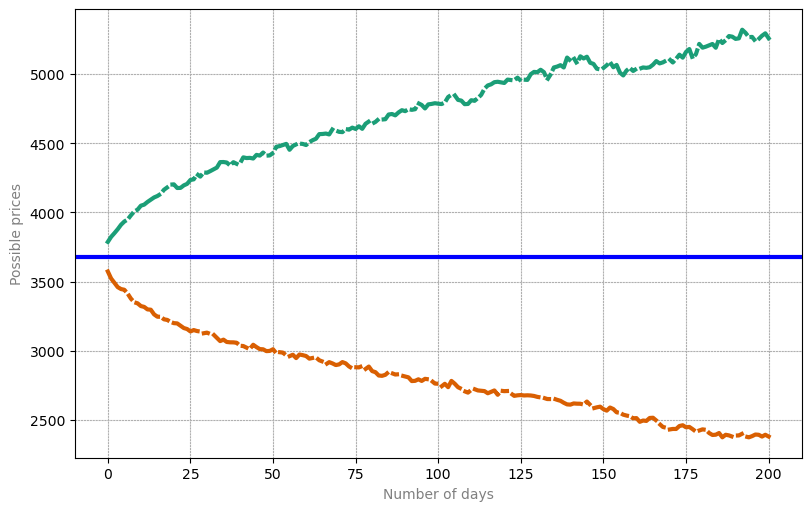

In [7]:
upper = simulation_df.quantile(.95, axis=1)
lower = simulation_df.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

In [8]:
returns = orig.pct_change()

# Number of samples per simulation
num_samples = 100

# distribution fitting
returns = returns[1::] # Drop the first element, which is "NA"
params = t.fit(returns[1::]) # fit with a student-t

# Generate random numbers from Student's t-distribution
results = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1000)
# Generate random numbers from Student's t-distribution
results = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1000)
print('degree of freedom = ', params[0])
print('loc = ', params[1])
print('scale = ', params[2])

degree of freedom =  5.343855751133688
loc =  0.0007685522161553357
scale =  0.013701389429203105


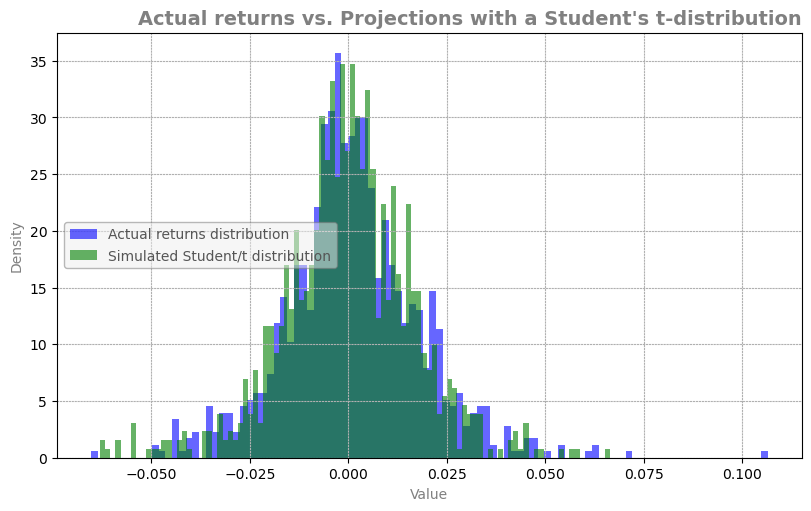

In [9]:
returns.hist(bins=100,density=True, alpha=0.6, color='b', label='Actual returns distribution')

# Plot histogram of results
plt.hist(results, bins=100, density=True, alpha=0.6, color='g', label='Simulated Student/t distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Actual returns vs. Projections with a Student\'s t-distribution')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

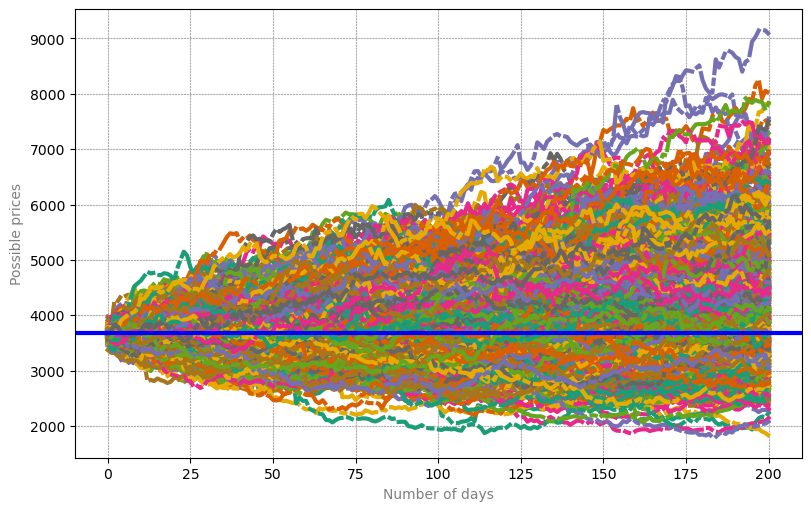

In [10]:
num_simulations = 1000
num_days = 200
simulation_student_t = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    # The first price point
    price_series = []
    rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_student_t[x] = price_series
fig = plt.figure()
plt.plot(simulation_student_t)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

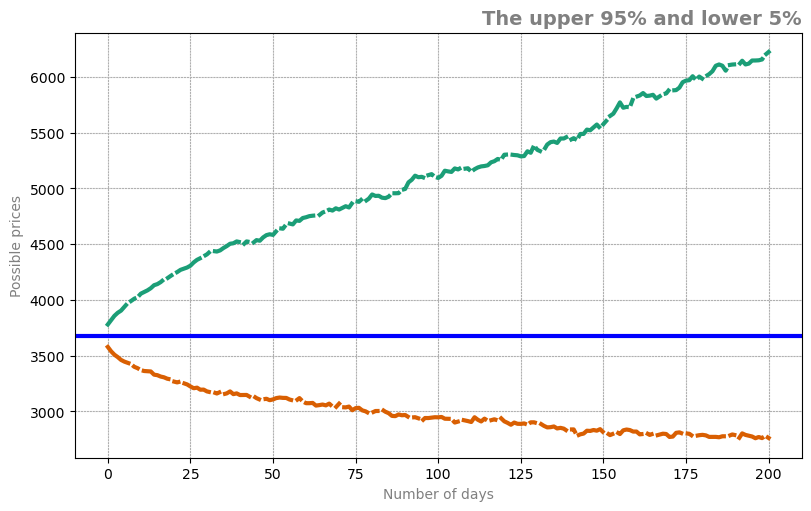

In [11]:
upper = simulation_student_t.quantile(.95, axis=1)
lower = simulation_student_t.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('The upper 95% and lower 5%')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()